In [1]:
# imports
import os
import sys
import time
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(10)

%load_ext autoreload
%autoreload 2

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
test_x = mnist.test.images.reshape(-1, 784)[0]
test_y = mnist.test.labels.reshape(-1, 10)[0]

In [4]:
import matplotlib.pyplot as plt

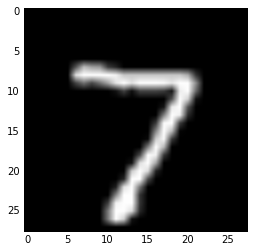

In [5]:
plt.imshow(test_x.reshape(28, 28), cmap='gray')

In [6]:
sess = tf.Session()

In [7]:
input_img = tf.placeholder(tf.float32, [None, 784])

In [8]:
output_1 = tf.pad(tf.reshape(input_img, (28, 28, 1)), [[0, 28], [0, 28], [0,0]])
output_3 = tf.pad(tf.reshape(input_img, (28, 28, 1)), [[28, 0], [0, 28], [0,0]])
output_2 = tf.pad(tf.reshape(input_img, (28, 28, 1)), [[0, 28], [28, 0], [0,0]])
output_4 = tf.pad(tf.reshape(input_img, (28, 28, 1)), [[28, 0], [28, 0], [0,0]])

In [9]:
op = sess.run(output_2, feed_dict={input_img: test_x.reshape(-1, 784)})

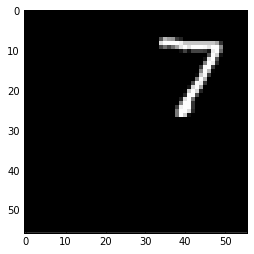

In [10]:
plt.imshow(op.reshape(56, 56), cmap='gray', interpolation='none')

In [11]:
op_dict = [output_1, output_2, output_3, output_4]

In [12]:
batch = mnist.train.next_batch(10)

In [13]:
new_batch = []

In [14]:
for i in range(10):
    t = np.random.randint(0, high=4)
    op = sess.run(op_dict[t], feed_dict={input_img: batch[0][i].reshape(-1, 784)})
    new_batch.append(np.array(op.reshape(3136)))

In [15]:
new_batch = np.array(new_batch)

In [20]:
for i in range(10):
    print(new_batch[i])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


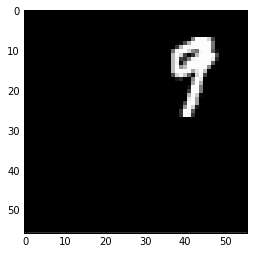

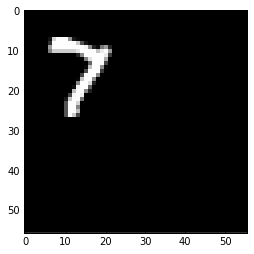

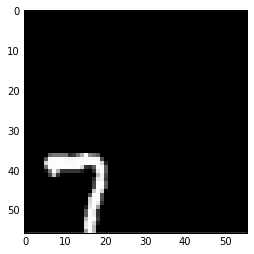

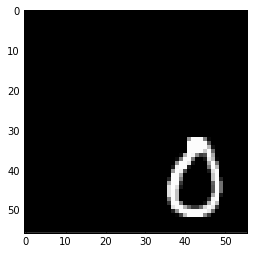

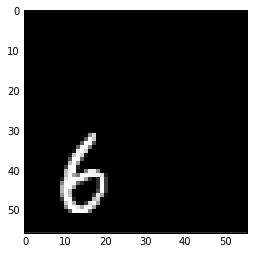

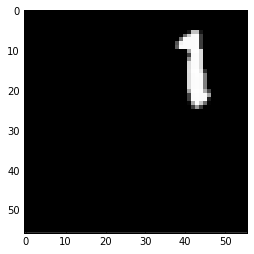

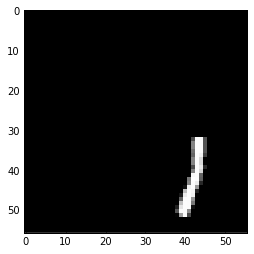

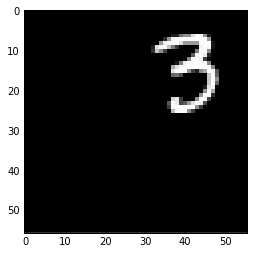

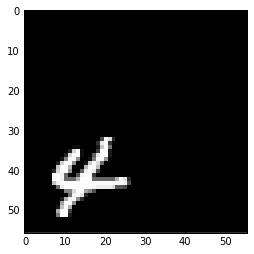

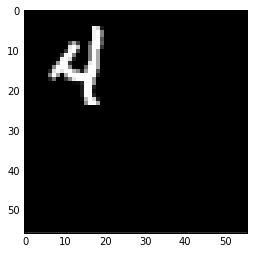

In [22]:
for i in range(10):
    plt.subplots()
    
    plt.imshow(new_batch[i].reshape((56, 56)), cmap='gray', interpolation='none')